In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important;}</style>"))
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

#### Importing the data

In [2]:
bank0 = pd.read_csv('bank marketing v2.csv')

In [3]:
bank0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  poutcome   11162 non-null  object
 13  deposit    11162 non-null  object
 14  p_recency  11162 non-null  object
dtypes: int64(4), object(11)
memory usage: 1.3+ MB


In [4]:
bank0.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,poutcome,deposit,p_recency
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,unknown,yes,None
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,unknown,yes,None
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,unknown,yes,None
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,unknown,yes,None
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,unknown,yes,None


In [5]:
bank0.deposit.value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [6]:
bank0.deposit.value_counts(normalize=True)

no     0.52616
yes    0.47384
Name: deposit, dtype: float64

#### Modifying the target variable to have 0/1 values

In [7]:
bank0.deposit = bank0.deposit.map({'yes':1, 'no':0})

In [8]:
bank0.deposit.value_counts(normalize=True)

0    0.52616
1    0.47384
Name: deposit, dtype: float64

### Assessing the categorical variables

In [9]:
bank0.education.value_counts(normalize=True)

secondary    0.490593
tertiary     0.330496
primary      0.134385
unknown      0.044526
Name: education, dtype: float64

In [10]:
cat_cols = bank0.select_dtypes("object").columns
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'p_recency'],
      dtype='object')

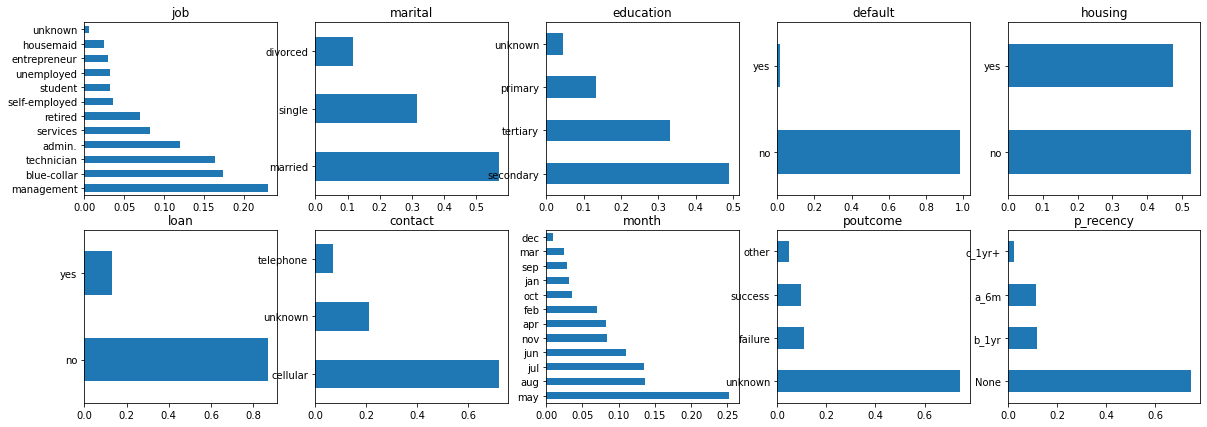

In [11]:
plt.figure(figsize=[20,7])
for ind, col in enumerate(cat_cols):
    plt.subplot(2,5,ind+1)
    bank0[col].value_counts(normalize=True).plot.barh()
    plt.title(col)
plt.show()

In [12]:
bank0.job.value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

### Numerical variables

In [13]:
num_cols = bank0.select_dtypes('number').columns
num_cols

Index(['age', 'balance', 'day', 'duration', 'deposit'], dtype='object')

**Dropping `day` and `duration` columns**

In [14]:
bank1 = bank0.drop(['duration','day'],axis=1)
bank1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'month', 'poutcome', 'deposit', 'p_recency'],
      dtype='object')

In [15]:
num_cols = bank1.select_dtypes('number').columns
num_cols = num_cols.drop('deposit')
num_cols

Index(['age', 'balance'], dtype='object')

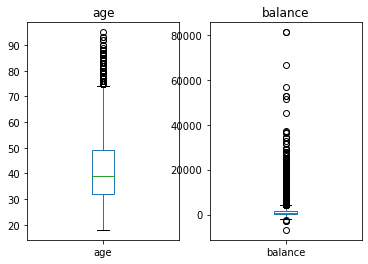

In [16]:
plt.figure(figsize=[6,4])
for ind, col in enumerate(num_cols):
    plt.subplot(1,2,ind+1)
    bank1[col].plot.box()
    plt.title(col)
plt.show()

#### Creating dummy variables for the categorical variables

Handling `default`, `loan`, `housing`

In [17]:
def binary_map(col):
    return col.map({'no':0, 'yes':1})

In [18]:
binary_cols = ['default', 'loan', 'housing']

In [19]:
bank1[binary_cols] = bank1[binary_cols].apply(binary_map)

In [20]:
bank1.housing.value_counts()

0    5881
1    5281
Name: housing, dtype: int64

In [21]:
bank0.housing.value_counts()

no     5881
yes    5281
Name: housing, dtype: int64

**Creating dummy features for education, marital, p_recency, poutcome, contact, job, month**

In [22]:
dumm_cols = ['education', 'marital', 'p_recency', 'contact','poutcome', 'job', 'month']

In [23]:
bank_dummies = pd.get_dummies(bank1[dumm_cols], drop_first=True)

In [24]:
bank_dummies.head()

,education_secondary,education_tertiary,education_unknown,marital_married,marital_single,p_recency_a_6m,p_recency_b_1yr,p_recency_c_1yr+,contact_telephone,contact_unknown,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [25]:
bank_dummies.shape

(11162, 35)

In [26]:
bank1.drop(dumm_cols, axis=1)

,age,default,balance,housing,loan,deposit
0,59,0,2343,1,0,1
1,56,0,45,0,0,1
2,41,0,1270,1,0,1
3,55,0,2476,1,0,1
4,54,0,184,0,0,1
...,...,...,...,...,...,...
11157,32,0,1547,0,0,1
11158,47,0,1387,1,0,0
11159,34,0,320,1,0,1
11160,31,0,243,1,0,1


**Concatenating dummies back on**

In [27]:
bank1 = pd.concat([bank1, bank_dummies],axis=1)
bank1.drop(dumm_cols, axis=1, inplace=True)
bank1.shape

(11162, 41)

In [28]:
bank1.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'deposit',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'marital_married', 'marital_single', 'p_recency_a_6m',
       'p_recency_b_1yr', 'p_recency_c_1yr+', 'contact_telephone',
       'contact_unknown', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep'],
      dtype='object')

---

# Model building
 - dividing into train and test sets
 - MinMax scaling for numeric features
 - build multiple predictive models

#### Dividing into train and test datasets

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
df_train, df_test = train_test_split(bank1, test_size=0.2, random_state=42, stratify=bank1.deposit)

In [31]:
df_train.shape, df_test.shape

((8929, 41), (2233, 41))

In [32]:
df_train.deposit.value_counts(normalize=True)

0    0.526151
1    0.473849
Name: deposit, dtype: float64

In [33]:
df_test.deposit.value_counts(normalize=True)

0    0.526198
1    0.473802
Name: deposit, dtype: float64

#### MinMax scaling for numeric features

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler = MinMaxScaler()

In [36]:
df_train[['age', 'balance']].describe()

,age,balance
count,8929.000000,8929.000000
mean,41.198790,1520.609811
std,11.865935,3062.472471
min,18.000000,-6847.000000
25%,32.000000,121.000000
50%,39.000000,550.000000
75%,49.000000,1728.000000
max,95.000000,81204.000000


In [37]:
df_train[['age', 'balance']] = scaler.fit_transform(df_train[['age', 'balance']])

In [38]:
df_train[['age', 'balance']].describe()

,age,balance
count,8929.000000,8929.000000
mean,0.301283,0.095031
std,0.154103,0.034781
min,0.000000,0.000000
25%,0.181818,0.079136
50%,0.272727,0.084008
75%,0.402597,0.097387
max,1.000000,1.000000


In [39]:
df_test[['age', 'balance']] = scaler.transform(df_test[['age', 'balance']])

## Building predictive models

In [40]:
X_train = df_train.drop('deposit', axis=1)
y_train = df_train['deposit']
X_test = df_test.drop('deposit', axis=1)
y_test = df_test['deposit']

In [41]:
X_train.shape

(8929, 40)

In [42]:
y_train.shape, y_test.shape

((8929,), (2233,))

### Beginning with Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
logreg = LogisticRegression(random_state=42)

In [45]:
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

**Evaluating the model**

In [46]:
y_train_pred = logreg.predict(X_train)

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [48]:
accuracy_score(y_train, y_train_pred)

0.7098219285474298

In [49]:
confusion_matrix(y_train, y_train_pred)

array([[3905,  793],
       [1798, 2433]], dtype=int64)

In [50]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.68      0.83      0.75      4698
           1       0.75      0.58      0.65      4231

    accuracy                           0.71      8929
   macro avg       0.72      0.70      0.70      8929
weighted avg       0.72      0.71      0.70      8929



**Performance on test set**

In [51]:
y_test_pred = logreg.predict(X_test)

In [52]:
accuracy_score(y_test, y_test_pred)

0.6932377966860725

### Using RandomForest

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rf = RandomForestClassifier(random_state=42, n_estimators=50, oob_score=True)

In [55]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, oob_score=True, random_state=42)

**Performance on the train set**

In [56]:
y_train_pred = rf.predict(X_train)

In [57]:
accuracy_score(y_train, y_train_pred)

0.9985440698846455

**Performance on unseen data**

In [58]:
y_test_pred = rf.predict(X_test)

In [59]:
accuracy_score(y_test, y_test_pred)

0.6932377966860725

# Model evaluation: Cross validation

In [60]:
from sklearn.model_selection import cross_val_score

In [61]:
?cross_val_score

In [62]:
cross_val_score(logreg, X_train, y_train, cv=5, n_jobs=-1)

array([0.70268757, 0.72228443, 0.7043673 , 0.70492721, 0.70644258])

In [63]:
cross_val_score(rf, X_train, y_train, cv=5, n_jobs=-1)

array([0.68085106, 0.71444569, 0.68756999, 0.69036954, 0.68851541])

In [64]:
cross_val_score(rf, X_train, y_train, cv=5, n_jobs=-1).mean()

0.6923503376714628

**Takeaway: Cross validation score gives a far more reliable estimate of the generalized perforance on unseen data**

**Note**: OOB Score in RandomForest is somewhat similar to cross val score

In [65]:
rf.oob_score_

0.6849591219621458

**Scoring methods in Cross val score**

In [66]:
?cross_val_score

In [67]:
import sklearn

In [68]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [69]:
cross_val_score(rf, X_train, y_train, cv=5, n_jobs=-1, scoring="recall")

array([0.61111111, 0.65484634, 0.63002364, 0.63046045, 0.63002364])

# Feature selection

In [70]:
X_train.shape

(8929, 40)

### Recursive Feature Elimination - RFE

In [71]:
from sklearn.feature_selection import RFE

In [72]:
logreg = LogisticRegression(random_state=42)

In [73]:
rfe = RFE(estimator=logreg, n_features_to_select=10)

In [74]:
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(random_state=42), n_features_to_select=10)

In [75]:
rfe.ranking_

array([31, 26,  1,  5,  7, 17, 15, 16, 13, 25, 14, 18,  1, 10,  1, 20,  1,
       30, 29, 23, 19, 22, 11, 21, 28,  1, 27, 12,  6,  4,  1,  9,  1,  3,
       24,  1,  8,  2,  1,  1])

In [76]:
X_train.columns[rfe.support_]

Index(['balance', 'p_recency_c_1yr+', 'contact_unknown', 'poutcome_success',
       'job_student', 'month_dec', 'month_jan', 'month_mar', 'month_oct',
       'month_sep'],
      dtype='object')

In [77]:
X_train2 = X_train.loc[:,rfe.support_]
X_train2.shape

(8929, 10)

In [78]:
X_train2.columns

Index(['balance', 'p_recency_c_1yr+', 'contact_unknown', 'poutcome_success',
       'job_student', 'month_dec', 'month_jan', 'month_mar', 'month_oct',
       'month_sep'],
      dtype='object')

Evaluation using cross val score

In [79]:
cross_val_score(logreg, X_train2, y_train, n_jobs=-1)

array([0.66741321, 0.67581187, 0.66573348, 0.67133259, 0.66330532])

## Cross validation for feature selection

In [80]:
num_features = X_train.shape
num_features[1]

40

In [81]:
cv_scores = []

In [82]:
logreg = LogisticRegression(random_state=42)

In [83]:
%%time
for features in range(1, num_features[1]+1):
    rfe = RFE(logreg, n_features_to_select=features)
    scores = cross_val_score(rfe, X_train, y_train, cv=4)
    cv_scores.append(scores.mean())

Wall time: 1min 16s


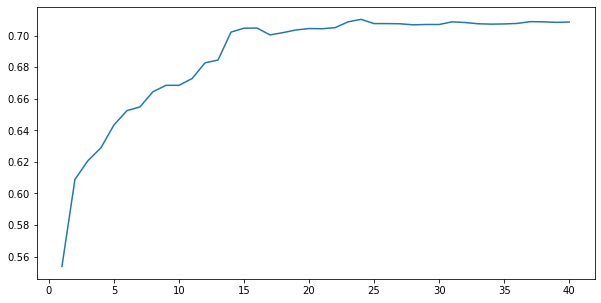

In [84]:
plt.figure(figsize=[10, 5])
plt.plot(range(1, num_features[1]+1), cv_scores)
plt.show()

#### Using RFECV

In [85]:
from sklearn.feature_selection import RFECV

In [86]:
rfecv = RFECV(estimator=logreg, cv=4)

In [87]:
%%time
rfecv.fit(X_train, y_train)

Wall time: 3.44 s


RFECV(cv=4, estimator=LogisticRegression(random_state=42))

In [88]:
rfecv.grid_scores_

array([0.55380763, 0.60891506, 0.62078732, 0.62896198, 0.64340945,
       0.65248083, 0.65483273, 0.66446414, 0.6684959 , 0.6684959 ,
       0.67275222, 0.68271795, 0.68451092, 0.7022077 , 0.7046706 ,
       0.70478211, 0.70041528, 0.70187113, 0.70355133, 0.70444679,
       0.70433478, 0.70500642, 0.70870256, 0.71027126, 0.70758314,
       0.70758304, 0.70747093, 0.70679899, 0.7070226 , 0.70702275,
       0.70870286, 0.70825488, 0.70747078, 0.70724687, 0.70735868,
       0.7076947 , 0.70881467, 0.70870261, 0.70836659, 0.7085906 ])

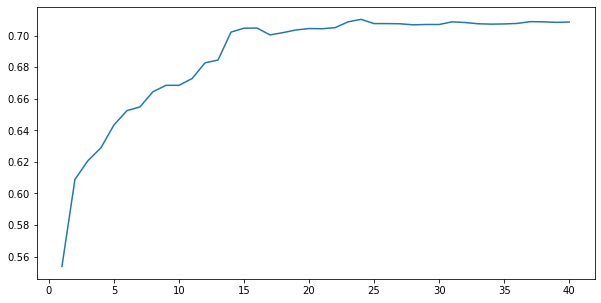

In [89]:
plt.figure(figsize=[10, 5])
plt.plot(range(1, num_features[1]+1), rfecv.grid_scores_)
plt.show()

In [90]:
rfecv.n_features_

24

## Hyper-parameter tuning using Cross Validation

In [91]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
from sklearn.model_selection import GridSearchCV

In [93]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [94]:
hyper_params = {'max_depth': [3, 5, 10, 15, 20],
                'max_features': [3, 5, 7, 11, 15],
                'min_samples_leaf': [20, 50, 100, 200, 400],
                'n_estimators': [10, 25, 50, 80, 100]
               }

In [95]:
?GridSearchCV

In [96]:
model_cv = GridSearchCV(estimator=rf, 
             param_grid=hyper_params,
             verbose=1,
             cv=5,
             n_jobs=-1,
             return_train_score=True)

In [97]:
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 625 candidates, totalling 3125 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 15, 20],
                         'max_features': [3, 5, 7, 11, 15],
                         'min_samples_leaf': [20, 50, 100, 200, 400],
                         'n_estimators': [10, 25, 50, 80, 100]},
             return_train_score=True, verbose=1)

In [98]:
model_cv.best_score_

0.7185570936101204

In [99]:
model_cv.best_estimator_

RandomForestClassifier(max_depth=15, max_features=15, min_samples_leaf=20,
                       n_jobs=-1, random_state=42)

In [100]:
cv_df = pd.DataFrame(model_cv.cv_results_)

In [101]:
cv_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.057810,0.003020,0.018137,0.001462,3,3,20,10,"{'max_depth': 3, 'max_features': 3, 'min_sampl...",0.646137,...,0.654161,0.006898,612,0.659807,0.660787,0.660787,0.651127,0.655375,0.657576,0.003795
1,0.125977,0.005765,0.053422,0.008816,3,3,20,25,"{'max_depth': 3, 'max_features': 3, 'min_sampl...",0.669653,...,0.673871,0.009723,498,0.681506,0.684166,0.677166,0.675626,0.677072,0.679107,0.003205
2,0.219126,0.028986,0.086025,0.017371,3,3,20,50,"{'max_depth': 3, 'max_features': 3, 'min_sampl...",0.675812,...,0.678239,0.007732,460,0.683466,0.681226,0.680666,0.678986,0.679451,0.680759,0.001575
3,0.344102,0.067793,0.086767,0.011932,3,3,20,80,"{'max_depth': 3, 'max_features': 3, 'min_sampl...",0.677492,...,0.679695,0.005922,449,0.683466,0.680106,0.680106,0.678006,0.682111,0.680759,0.001875
4,0.422185,0.072110,0.082113,0.008932,3,3,20,100,"{'max_depth': 3, 'max_features': 3, 'min_sampl...",0.673012,...,0.677567,0.005392,467,0.683326,0.680526,0.680806,0.675906,0.680711,0.680255,0.002405


In [102]:
cv_df.sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
479,0.714013,0.156822,0.118205,0.047396,15,15,20,100,"{'max_depth': 15, 'max_features': 15, 'min_sam...",0.704927,...,0.718557,0.008308,1,0.752485,0.746605,0.749405,0.746745,0.749160,0.748880,0.002149
478,0.409231,0.120063,0.212689,0.090267,15,15,20,80,"{'max_depth': 15, 'max_features': 15, 'min_sam...",0.702128,...,0.718221,0.009073,2,0.753325,0.746185,0.748565,0.747865,0.749720,0.749132,0.002389
604,0.796935,0.129214,0.204822,0.061236,20,15,20,100,"{'max_depth': 20, 'max_features': 15, 'min_sam...",0.704367,...,0.717325,0.007645,3,0.755705,0.751505,0.752905,0.751225,0.751120,0.752492,0.001729
453,0.444514,0.060069,0.099866,0.028396,15,11,20,80,"{'max_depth': 15, 'max_features': 11, 'min_sam...",0.704927,...,0.717325,0.008314,4,0.747865,0.743385,0.746045,0.743665,0.745941,0.745380,0.001664
454,0.647435,0.088800,0.136543,0.012559,15,11,20,100,"{'max_depth': 15, 'max_features': 11, 'min_sam...",0.705487,...,0.717213,0.008689,5,0.750245,0.743945,0.745345,0.743525,0.746081,0.745828,0.002394


In [103]:
sel_cols = ['param_max_depth','param_max_features','param_min_samples_leaf','param_n_estimators', 'rank_test_score',  'mean_test_score']

In [104]:
cv_df.sort_values(by='rank_test_score')[sel_cols].head(20)

,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,rank_test_score,mean_test_score
479,15,15,20,100,1,0.718557
478,15,15,20,80,2,0.718221
604,20,15,20,100,3,0.717325
453,15,11,20,80,4,0.717325
454,15,11,20,100,5,0.717213
452,15,11,20,50,6,0.717213
477,15,15,20,50,7,0.716989
602,20,15,20,50,8,0.716766
554,20,7,20,100,9,0.716542
603,20,15,20,80,10,0.716542


### Understand better the effect of Hyper-parameter

In [105]:
cv_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_max_features', 'param_min_samples_leaf',
       'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

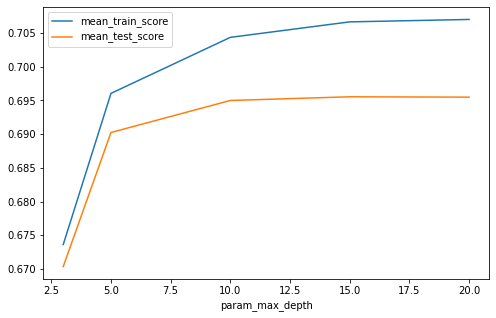

In [106]:
cv_df.groupby('param_max_depth')['mean_train_score', 'mean_test_score'].mean().plot(figsize=[8,5])
plt.show()

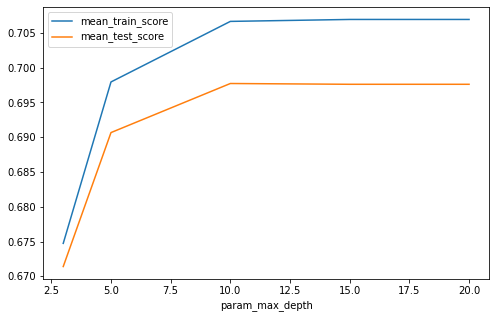

In [107]:
cv_df.groupby('param_max_depth')['mean_train_score', 'mean_test_score'].agg(np.median).plot(figsize=[8,5])
plt.show()

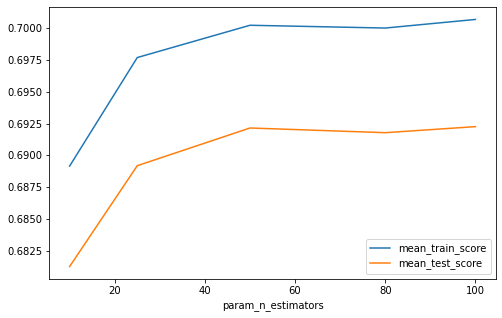

In [108]:
cv_df.groupby('param_n_estimators')['mean_train_score', 'mean_test_score'].agg(np.mean).plot(figsize=[8,5])
plt.show()

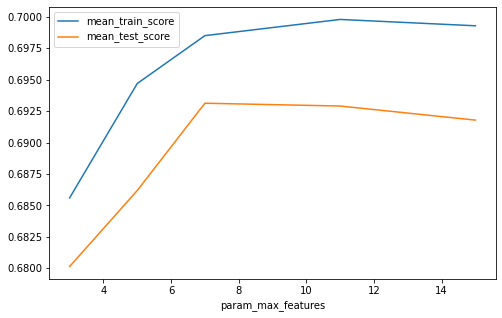

In [109]:
cv_df.groupby('param_max_features')['mean_train_score', 'mean_test_score'].agg(np.median).plot(figsize=[8,5])
plt.show()

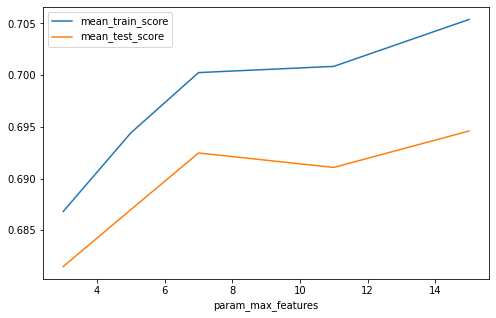

In [110]:
cv_df.groupby('param_max_features')['mean_train_score', 'mean_test_score'].agg(np.mean).plot(figsize=[8,5])
plt.show()

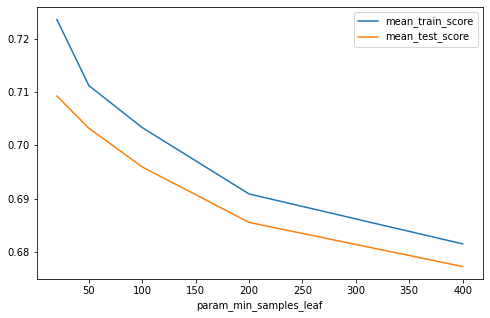

In [111]:
cv_df.groupby('param_min_samples_leaf')['mean_train_score', 'mean_test_score'].agg(np.median).plot(figsize=[8,5])
plt.show()

#### Fine-tuning using GridSearch

In [112]:
hyper_parameters = {'min_samples_leaf': [5, 10, 20, 50],
                    'n_estimators': [50, 60, 70],
                    'max_features': [10, 12, 14, 16]    
}

In [113]:
rf = RandomForestClassifier(max_depth=12, random_state=42, n_jobs=-1)

In [114]:
model_cv2 = GridSearchCV(estimator=rf,
                        param_grid=hyper_parameters,
                        verbose=1,
                        cv=5,
                        return_train_score=True,
                        n_jobs=-1)

In [115]:
model_cv2.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=12, n_jobs=-1,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [10, 12, 14, 16],
                         'min_samples_leaf': [5, 10, 20, 50],
                         'n_estimators': [50, 60, 70]},
             return_train_score=True, verbose=1)

In [116]:
model_cv2.best_score_

0.7203497479618948

In [117]:
model_cv2.best_estimator_

RandomForestClassifier(max_depth=12, max_features=10, min_samples_leaf=10,
                       n_estimators=60, n_jobs=-1, random_state=42)

### RandomizedSearchCV

In [118]:
from sklearn.model_selection import RandomizedSearchCV

In [119]:
hyper_params = {'max_depth': range(3, 20),
                'max_features': range(3, 17),
                'min_samples_leaf': range(20, 400, 50),
                'n_estimators': range(10, 101, 10)}

In [120]:
model_rcv = RandomizedSearchCV(estimator=rf, 
                              param_distributions=hyper_params,
                              verbose=1,
                              cv=5,
                              return_train_score=True,
                              n_jobs=-1,
                              n_iter=50)

In [121]:
model_rcv.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_depth=12, n_jobs=-1,
                                                    random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': range(3, 20),
                                        'max_features': range(3, 17),
                                        'min_samples_leaf': range(20, 400, 50),
                                        'n_estimators': range(10, 101, 10)},
                   return_train_score=True, verbose=1)

In [122]:
model_rcv.best_score_

0.7164292458304711

In [123]:
model_cv.best_score_

0.7185570936101204

### Extracting the best model and asessing test performance

In [124]:
model_cv2.best_score_

0.7203497479618948

In [125]:
rf_best = model_cv2.best_estimator_

In [126]:
rf_best

RandomForestClassifier(max_depth=12, max_features=10, min_samples_leaf=10,
                       n_estimators=60, n_jobs=-1, random_state=42)

In [127]:
y_test_pred = rf_best.predict(X_test)

In [128]:
accuracy_score(y_test, y_test_pred)

0.7026421854008061

### Other cross validation schemes in Sklearn

In [129]:
logreg = LogisticRegression(random_state=42)

In [130]:
?cross_val_score

In [131]:
from sklearn.model_selection import KFold, StratifiedKFold

In [133]:
folds = KFold( n_splits=5)

In [134]:
scores = cross_val_score(logreg, X_train2, y_train, cv=folds, scoring="recall")
scores

array([0.36829559, 0.38675958, 0.39875   , 0.3703271 , 0.37028571])

Stratified KFold

In [136]:
folds = StratifiedKFold( n_splits=5)

In [137]:
scores = cross_val_score(logreg, X_train2, y_train, cv=folds, scoring="recall")
scores

array([0.36879433, 0.38652482, 0.38534279, 0.37544274, 0.37115839])

#### Manually accessing the splits

In [142]:
folds = KFold(random_state=42, n_splits=5, shuffle=True)

In [147]:
for train_ind, test_ind in folds.split(X_train2):
    test_X = X_train2.iloc[test_ind,:]
    print(test_X.shape)

(1786, 10)
(1786, 10)
(1786, 10)
(1786, 10)
(1785, 10)


#### LeaveOneOut Scheme

In [148]:
from sklearn.model_selection import LeaveOneOut

In [149]:
folds = LeaveOneOut()

In [150]:
X_train2.shape

(8929, 10)

In [151]:
ctr = 0

In [152]:
for train_ind, test_ind in folds.split(X_train2):
    ctr = ctr + 1

In [153]:
ctr

8929

In [154]:
folds = LeaveOneOut()

In [155]:
%%time
scores = cross_val_score(logreg, X_train2, y_train, cv=folds, n_jobs=-1)

Wall time: 42.2 s


In [156]:
scores[:10]

array([0., 0., 0., 0., 0., 1., 1., 1., 1., 0.])

In [157]:
scores.mean()

0.6690558853175047